# Information
Authors: Shreyans Patel (SSP210009) and Pranitha Sreethar (PXS200095)

Dataset Owner/Donor Information:

Name: Volker Lohweg, Helene Doerksen

Institutions: University of Applied Sciences, Ostwestfalen-Lippe

Email: volker.lohweg@hs-owl.de, helene.doerksen@hs-owl.de

Date Donated: August 2012 

Dataset Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

References:

1) https://scikit-learn.org/stable/modules/classes.html

2) https://numpy.org/doc/stable/reference/

3) https://archive.ics.uci.edu/ml/datasets/banknote+authentication

4) https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/

5) https://machinelearningmastery.com/neural-network-for-banknote-authentication/

In [1]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings as warn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning

%matplotlib inline
warn.simplefilter('ignore', ConvergenceWarning)

Data Loaded Successfully
Bank Note Authentication Data Set has 1372 data points with 5 variables each.
            0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]

Pre-Processing the Data:

Null entries found?: No

Duplicate entries found?: Yes

Removing all the duplicate entries

Duplicate entries found?: No

Check for categorical values:
0    float64
1    float64
2    float64
3    float64
4      int64
dtype: object

For easy analysis, we rename the column headers

      Variance  Skewness

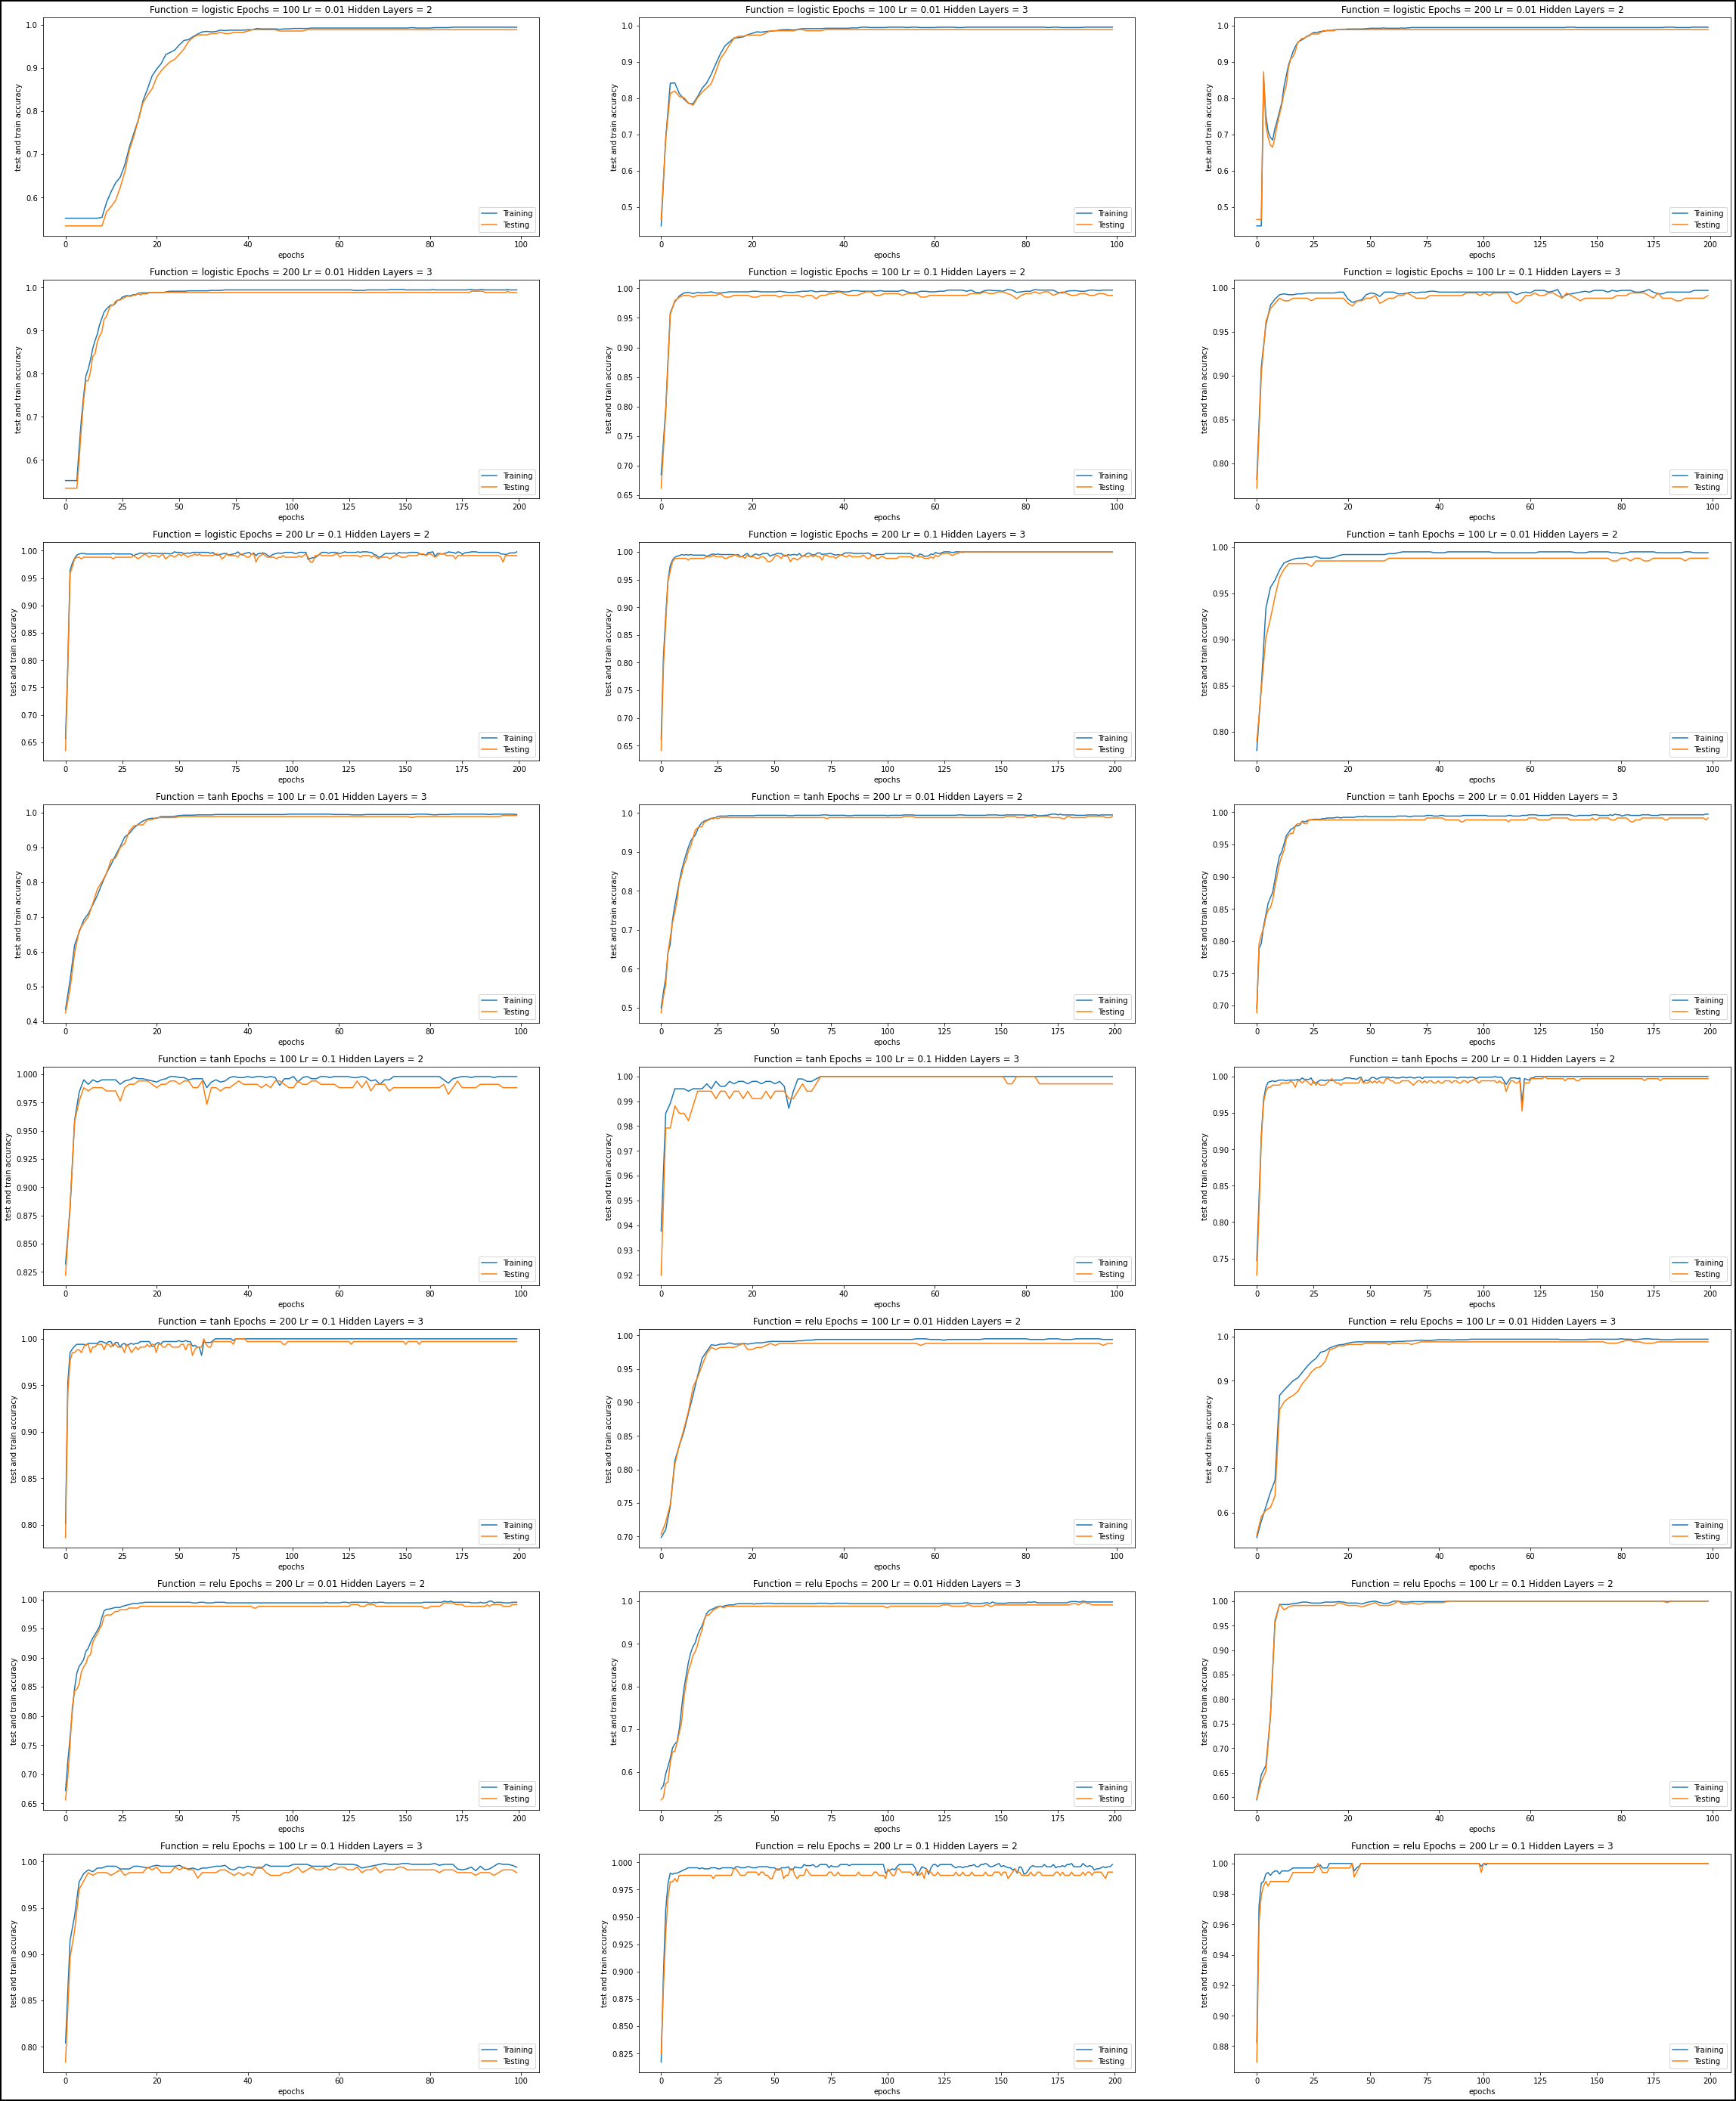

In [2]:
class NeuralNet:
    def __init__(self, dataFile, header = True):
        self.raw_input = pd.DataFrame(pd.read_csv(dataFile, header = None))
        
        # Loaded Successfully
        print("Data Loaded Successfully")
        print("Bank Note Authentication Data Set has {} data points with {} variables each.".format(*self.raw_input.shape))
        print(self.raw_input)

    # Preprocessing Stage
    def preprocess(self):
        print("\nPre-Processing the Data:\n")
        self.processed_data = self.raw_input

        # Check for null values in the dataframe
        print("Null entries found?:", ("No\n" if self.processed_data.isnull().sum().sum() == 0 else "Yes\n"))

        # Check for duplicate values in the dataframe
        print("Duplicate entries found?:", ("No\n" if self.processed_data.duplicated().sum() == 0 else "Yes\n"))

        # Remove the duplicate columns
        print("Removing all the duplicate entries\n")
        self.processed_data = self.processed_data.drop_duplicates()

        # Check for duplicate values in the dataframe again
        print("Duplicate entries found?:", ("No\n" if self.processed_data.duplicated().sum() == 0 else "Yes\n"))
        
        # Check if there is any categorical values
        print("Check for categorical values:")
        print(self.processed_data.dtypes)

        # The dataset contains no column headers, so we add them manually for easy analysis
        print("\nFor easy analysis, we rename the column headers\n")
        new_columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
        self.processed_data.columns = new_columns
        print(self.processed_data)
        print(self.processed_data.describe())

    # TODO: Train and evaluate models for all combinations of parameters
    # specified. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model

    def train_evaluate(self):
        print("\nTraining the model:\n")
        # Initializing important variables
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        X = self.processed_data.iloc[:, 0:(ncols - 1)]
        y = self.processed_data.iloc[:, (ncols-1)]
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        # Declaring lists to store required results
        train_accuracy_list = []
        test_accuracy_list = []
        train_mse_list = []
        test_mse_list = []
        activation_list = []
        learning_rate_list = []
        iterations_list = []
        hidden_layers_list = []

        # Plot related variables declared
        plt_count = 1
        main_plt = plt.figure(edgecolor = 'black', linewidth = 4)
        main_plt.set_figheight(50)
        main_plt.set_figwidth(40)

        # Scaling the data set
        std_scaler = StandardScaler()
        X_train = std_scaler.fit_transform(X_train)
        X_test = std_scaler.transform(X_test)

        # Hyperparameters for evaluation and analysis
        activations = ['logistic', 'tanh', 'relu']
        learning_rate = [0.01, 0.1]
        max_iterations = [100, 200] # also known as epochs
        num_hidden_layers = [2, 3]

        # Create the neural network and be sure to keep track of the performance
        for function in activations:
          for rate in learning_rate:
            for iterations in max_iterations:
              for size in num_hidden_layers:
                # Store training parameters
                activation_list.append(function)
                learning_rate_list.append(rate)
                iterations_list.append(iterations)
                hidden_layers_list.append(size)
                tmp_train_accuracy = []
                tmp_test_accuracy = []
                tmp_iterations = []

                # Initialize the model
                model = MLPClassifier(activation = function, learning_rate_init = rate, max_iter = iterations, hidden_layer_sizes = size)

                # For history of model while training
                for i in range (1, iterations + 1, 1):
                  tmp_iterations.append(i)
                  
                  # Fit for one iteration
                  model.partial_fit(X_train,y_train, classes = np.unique(y_train))

                  # Test on train data
                  y_pred = model.predict(X_train)
                  y_pred = (y_pred > 0.5).flatten().astype(int) 
                  accuracy = accuracy_score(y_train, y_pred)
                  mse = mean_squared_error(y_train, y_pred)

                  # Store test results
                  tmp_train_accuracy.append(accuracy)

                  # Only store final result in the result table
                  if(i == iterations):
                    train_accuracy_list.append(accuracy)
                    train_mse_list.append(mse)

                  # Test on test data
                  y_pred = model.predict(X_test)
                  y_pred = (y_pred > 0.5).flatten().astype(int) 
                  accuracy = accuracy_score(y_test, y_pred)
                  mse = mean_squared_error(y_test, y_pred)

                  # Store test results
                  tmp_test_accuracy.append(accuracy)

                  # Only store final result in the result table
                  if(i == iterations):
                    test_accuracy_list.append(accuracy)
                    test_mse_list.append(mse) 

                # Plot for each model
                print(plt_count, "Plotting results with parameters:",'Function =', function, 'Epochs = ' + str(iterations) + ' Lr = ' + str(rate) + ' Hidden Layers = ' + str(size))
                figure = main_plt.add_subplot(8,3,plt_count)
                figure.plot(tmp_train_accuracy, label = 'Training')
                figure.plot(tmp_test_accuracy, label = 'Testing')
                figure.set_xlabel('epochs')
                figure.set_ylabel('test and train accuracy')
                figure.set_title('Function = ' + function + ' Epochs = ' + str(iterations) + ' Lr = ' + str(rate) + ' Hidden Layers = ' + str(size))
                figure.legend(loc = "lower right")
                plt_count += 1

        result_table = pd.DataFrame({'Activation':activation_list,
                              'Learning_Rate':learning_rate_list,
                              'Max_Iterations':iterations_list,
                              'Hidden_Layers':hidden_layers_list,
                              'Accuracy_train':train_accuracy_list,
                              'MSE_train':train_mse_list,
                              'Accuracy_test':test_accuracy_list,
                              'MSE_test':test_mse_list})

        result_table.index = result_table.index + 1

        result_table.to_csv('results.csv')
        print("\nPrinting the required output table:\n")
        print(result_table)
        

if __name__ == "__main__":
    neural_network = NeuralNet("https://raw.githubusercontent.com/Shreyans1602/Machine_Learning_Neural_Networks/main/Dataset.txt") # put in path to your file
    neural_network.preprocess()
    neural_network.train_evaluate()